<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Importing Modules and Libraries</p>
</div>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Reading Data</p>
</div>


In [2]:
data=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Preprocessing</p>
</div>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
data.duplicated().sum()

1768

In [5]:
data.drop_duplicates(inplace=True)

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Duplicate Values are deleted</strong></li>
    </ul>
</div>


In [6]:
data.gender=LabelEncoder().fit_transform(data.gender)

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Categorical Features are encoded to numerical 1 - Female and 0 - Male .</strong></li>
    </ul>
</div>


<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Correlation Heatmap</p>
</div>


Text(0.5, 1.0, 'Heatmap')

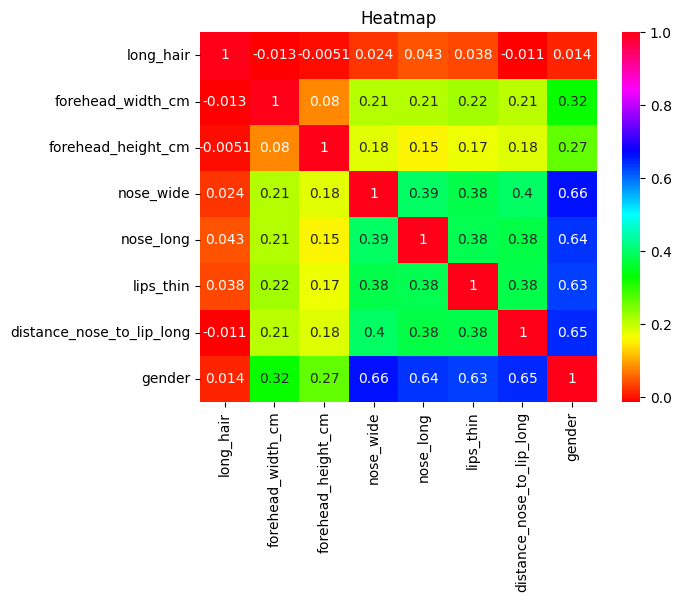

In [7]:
sn.heatmap(data.corr(),annot=True,cmap='hsv')
plt.title('Heatmap')

In [8]:
x=data.drop('gender',axis=1)
y=data.gender

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Analysis using p-value </p>
</div>


In [9]:
x=data.iloc[:,np.where(f_regression(x,y)[1]<0.01)[0]]
y=data.gender

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>The heatmap and f_regression values are similar so we take f_regression values</strong></li>
    </ul>
</div>


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Visualization</p>
</div>


<div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; text-align: center; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2c3e50; font-size: 140%; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7); margin: 0;">Categorical Features</p>
</div>


<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Class Balance Checking </p>
</div>


Text(0.5, 1.0, 'Class Balance Checking')

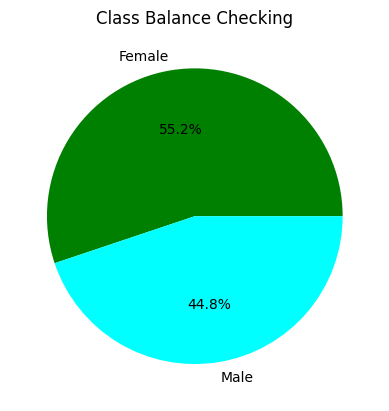

In [10]:
gender_value=data.gender.value_counts()
plt.pie(x=gender_value,autopct='%1.1f%%',labels=["Female",'Male'],colors=['green','cyan'])
plt.title('Class Balance Checking')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Here the classes are already in balanced state .</strong></li>
    </ul>
</div>


<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Long hair peoples frequency </p>
</div>


Text(0.5, 1.0, 'long_hair')

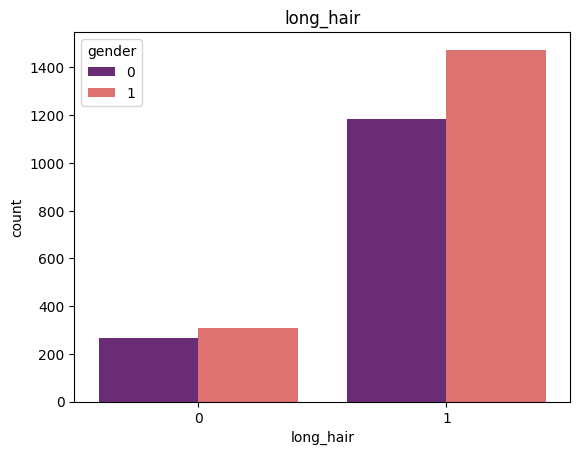

In [11]:
sn.countplot(x='long_hair',hue='gender',data=data,palette='magma')
plt.title('long_hair')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Most of the females have long hairs</strong></li>
    </ul>
</div>


Text(0.5, 1.0, 'lips_thin')

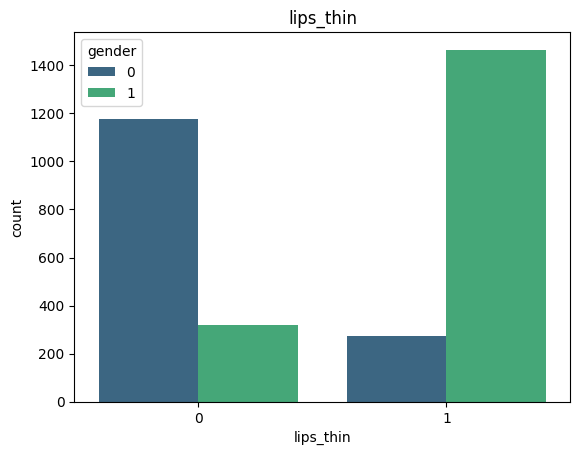

In [12]:
sn.countplot(x='lips_thin',hue='gender',data=data,palette='viridis')
plt.title('lips_thin')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Most of the females have thin lips .</strong></li>
    </ul>
</div>


Text(0.5, 1.0, 'nose_wide')

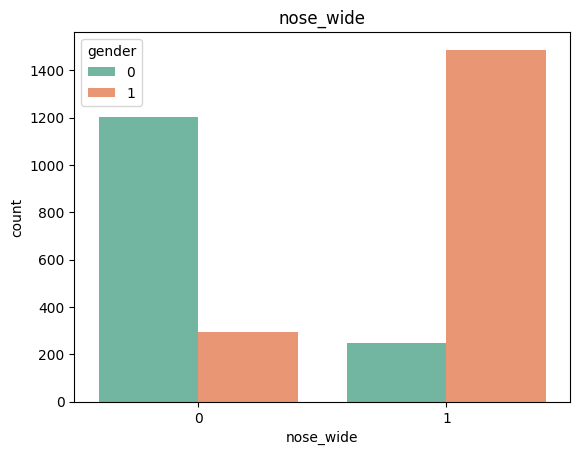

In [13]:
sn.countplot(x='nose_wide',hue='gender',data=data,palette='Set2')
plt.title('nose_wide')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Most of the females have wider nose</strong></li>
    </ul>
</div>


Text(0.5, 1.0, 'nose_long')

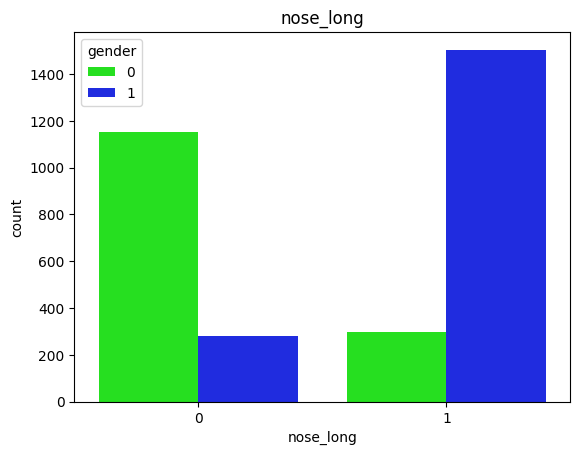

In [14]:
sn.countplot(x='nose_long',hue='gender',data=data,palette='hsv')
plt.title('nose_long')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Most of the females have long nose</strong></li>
    </ul>
</div>


Text(0.5, 1.0, 'distance_nose_to_lip_long')

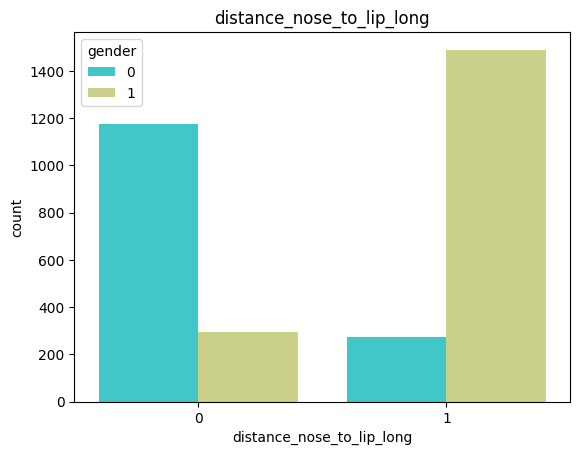

In [15]:
sn.countplot(x='distance_nose_to_lip_long',hue='gender',data=data,palette='rainbow')
plt.title('distance_nose_to_lip_long')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Most of the females have long distance between their nose and lips </strong></li>
    </ul>
</div>


<div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; text-align: center; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2c3e50; font-size: 140%; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7); margin: 0;">Numerical Features</p>
</div>


Text(0.5, 1.0, 'forehead_width_cm')

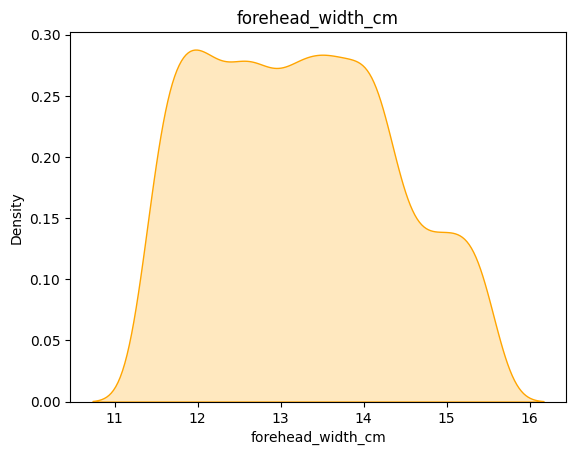

In [16]:
sn.kdeplot(x=data.forehead_width_cm,fill=True,color='orange')
plt.title('forehead_width_cm')

Text(0.5, 1.0, 'forehead_height_cm')

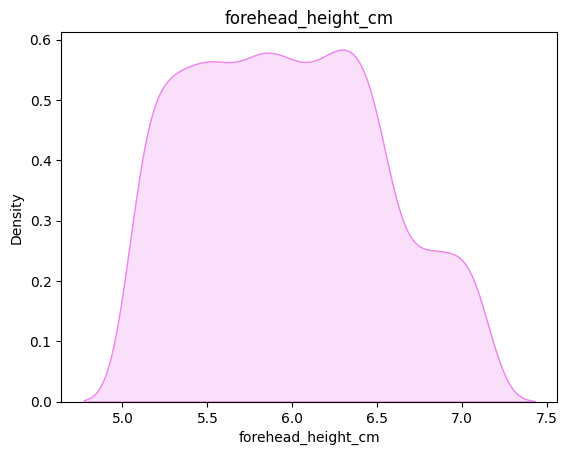

In [17]:
sn.kdeplot(x=data.forehead_height_cm,fill=True,color='violet')
plt.title('forehead_height_cm')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>These features follows normal distribution .</strong></li>
    </ul>
</div>


Text(0.5, 1.0, 'forehead_height_cm')

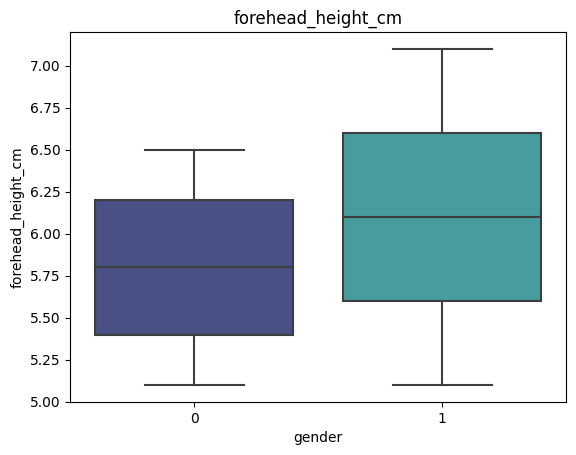

In [18]:
sn.boxplot(x='gender',y='forehead_height_cm',data=data,palette='mako')
plt.title('forehead_height_cm')

Text(0.5, 1.0, 'forehead_width_cm')

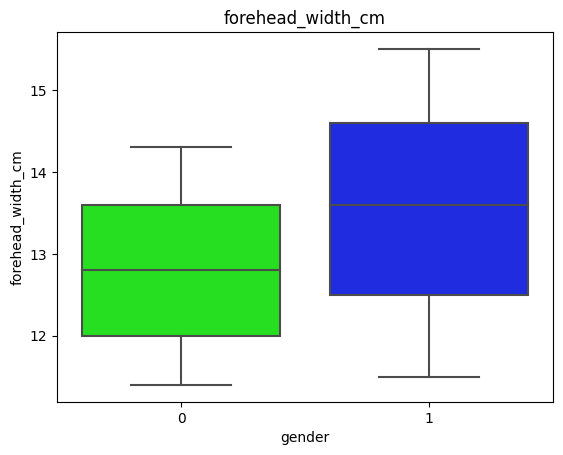

In [19]:
sn.boxplot(x='gender',y='forehead_width_cm',data=data,palette='hsv')
plt.title('forehead_width_cm')

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>It shows forehead width and height is large for females</strong></li>
    </ul>
</div>


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Machine Learning</p>
</div>


In [20]:
ss=StandardScaler()
tup1=('ss',ss)

<div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; text-align: center; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2c3e50; font-size: 140%; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7); margin: 0;">Models</p>
</div>


In [21]:

model5=xgb.XGBClassifier()
model1=RandomForestClassifier()
model2= BaggingClassifier()
model3=KNeighborsClassifier()
model4=DecisionTreeClassifier()

<div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; text-align: center; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2c3e50; font-size: 140%; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7); margin: 0;">Pipelines</p>
</div>


In [22]:
p1=Pipeline(steps=[tup1,('model1',model1)])
p2=Pipeline(steps=[tup1,('model2',model2)])
p3=Pipeline(steps=[tup1,('model3',model3)])
p4=Pipeline(steps=[tup1,('model4',model4)])
p5=Pipeline(steps=[tup1,('model5',model5)])

<div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; text-align: center; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2c3e50; font-size: 140%; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7); margin: 0;">Splitting Data</p>
</div>


In [23]:
xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2)

<div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; text-align: center; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2c3e50; font-size: 140%; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7); margin: 0;">Cross val scores of models</p>
</div>


In [24]:
cross_val_score(p1,x,y).mean()

0.9492738574320153

In [25]:
cross_val_score(p2,x,y).mean()

0.9458673276517962

In [26]:
cross_val_score(p3,x,y).mean()

0.946487479723037

In [27]:
cross_val_score(p4,x,y).mean()

0.941847344973945

In [28]:
cross_val_score(p5,x,y).mean()

0.9505117690124939

In [29]:
bm1=p5.fit(x,y)
bm2=p1.fit(x,y)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Model Saving</p>
</div>


In [30]:
import pickle as pk
pk.dump(bm2,open('/kaggle/working/trainedmodel.pkl','wb'),protocol=pk.HIGHEST_PROTOCOL)

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #fff; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Model Utilization</p>
</div>


In [31]:
"""import pickle as pk
import pandas as pd
import numpy as np
model=pk.load(open('/kaggle/working/trainedmodel.pkl','rb'))
def classify_face():
    forehead_width = float(input("Enter forehead width (cm): "))
    forehead_height = float(input("Enter forehead height (cm): "))
    nose_wide = int(input("Is the nose wide? (1 for Yes, 0 for No): "))
    nose_long = int(input("Is the nose long? (1 for Yes, 0 for No): "))
    lips_thin = int(input("Are the lips thin? (1 for Yes, 0 for No): "))
    distance_nose_to_lip_long = int(input("Is the distance from nose to lip long? (1 for Yes, 0 for No): "))
    return forehead_width,forehead_height,nose_wide,nose_long,lips_thin, distance_nose_to_lip_long


values=classify_face()
df=pd.DataFrame(np.array(values).reshape(1,-1),columns=['forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long',
       'lips_thin', 'distance_nose_to_lip_long'])
predict=model.predict(df)[0]
if predict==1:
    print('Female')
else:
    print('Male') """

'import pickle as pk\nimport pandas as pd\nimport numpy as np\nmodel=pk.load(open(\'/kaggle/working/trainedmodel.pkl\',\'rb\'))\ndef classify_face():\n    forehead_width = float(input("Enter forehead width (cm): "))\n    forehead_height = float(input("Enter forehead height (cm): "))\n    nose_wide = int(input("Is the nose wide? (1 for Yes, 0 for No): "))\n    nose_long = int(input("Is the nose long? (1 for Yes, 0 for No): "))\n    lips_thin = int(input("Are the lips thin? (1 for Yes, 0 for No): "))\n    distance_nose_to_lip_long = int(input("Is the distance from nose to lip long? (1 for Yes, 0 for No): "))\n    return forehead_width,forehead_height,nose_wide,nose_long,lips_thin, distance_nose_to_lip_long\n\n\nvalues=classify_face()\ndf=pd.DataFrame(np.array(values).reshape(1,-1),columns=[\'forehead_width_cm\', \'forehead_height_cm\', \'nose_wide\', \'nose_long\',\n       \'lips_thin\', \'distance_nose_to_lip_long\'])\npredict=model.predict(df)[0]\nif predict==1:\n    print(\'Female\')\

<div style="border-radius: 10px; border: 2px solid #42A5F5; padding: 15px; background-color: #FFF; font-size: 120%; text-align: left; color: #42A5F5; box-shadow: 0 0 15px rgba(66, 165, 245, 0.7);">
    <h2 style="font-weight: bold; font-size: 150%; color: #42A5F5; margin-bottom: 10px;">Level -2 Utilization</h2>
    <p class="quote" style="font-style: italic; color: #42A5F5; margin: 0 0 20px;">"The web app has been created using this model's "</p>
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <a href="https://gender-classification.streamlit.app/">Webapp Link</a> 
        
</div>


<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Thank u for visiting</p>
